# <center> Визуализация данных из датасета "Московский марафон 2018"

## <center>Часть 1. Применяем Matplotlib


Настроим окружение: импортируем необходимые библиотеки и настроим отображение картинок.

In [621]:
! dir

 Том в устройстве C имеет метку Windows 10
 Серийный номер тома: F86A-58E3

 Содержимое папки C:\Users\User\YandexDisk\LIFE!\DS\Netology\ДЗ\Python для анализа данных\HW7

31.12.2018  09:54    <DIR>          .
31.12.2018  09:54    <DIR>          ..
30.12.2018  22:53    <DIR>          .ipynb_checkpoints
03.10.2018  11:52         3 869 270 1_full_results_mm_2018.csv
31.12.2018  09:54         9 724 322 HW 7 Pikulev Lev Python course.ipynb
30.12.2018  11:56             3 371 pairplot.png
30.12.2018  23:28            93 199 pairplot2.png
31.12.2018  07:47        14 405 476 Word cloud.ipynb
30.12.2018  21:30         2 875 286 Распределение бегунов.html
               6 файлов     30 970 924 байт
               3 папок  85 519 511 552 байт свободно


In [622]:
# установим seaborn
! pip3 install seaborn

In [623]:
# установим plotly
! pip3 install plotly

In [624]:
# установим ggplot
! pip3 install ggplot

In [625]:
# установим matplotlib
! pip3 install matplotlib

In [626]:
# установим __future__
from __future__ import (absolute_import, division, print_function, unicode_literals)

In [627]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# для отображения графиков прямо в jupyter notebook
%pylab inline
# просим отображать графики в svg для большей четкости
%config InlineBackend.figure_format = 'svg' 

#увеличим размер графиков по умолчанию
from pylab import rcParams
rcParams['figure.figsize'] = 10,3

Populating the interactive namespace from numpy and matplotlib


In [628]:
# импортируем пандас и сиборн
import pandas as pd
import seaborn as sns

После этого загрузим в dataframe данные, с которыми будем работать. Для примеров визуализаций я выбрал данные о результатах Московского марафона 2018, в котором сам принимал участие, поэтому интересно. Датасет взят с Kaggle Datasets. 

In [629]:
marathon_df = pd.read_csv('1_full_results_mm_2018.csv')
marathon_df.shape

(21662, 19)

In [630]:
marathon_df.head()

,bib,finish_time_sec,finish_time_result,race,pace_sec,pace(minpkm),pace(kmph),half_pace_sec,half_pace(minpkm),half_pace(kmph),gender_en,age,name_en,location_city_ru,location_city_en,country_code_alpha_3,flag_DNF,flag_all_split_exist,race_uniform_index
0,1,8911.0,2h 28min 31sec,42.195 km,211.186159,3:31 min/km,17.0 km/h,208.318521,3:28 min/km,17.3 km/h,Female,30,Sardana Trofimova,Якутск,Yakutsk,RUS,0,1,0.000133
1,2,9308.0,2h 35min 08sec,42.195 km,220.594857,3:40 min/km,16.3 km/h,212.157839,3:32 min/km,17.0 km/h,Female,35,Tat'yana Arkhipova,Чебоксары,Cheboksary,RUS,0,1,0.002556
2,3,8122.0,2h 15min 22sec,42.195 km,192.487262,3:12 min/km,18.7 km/h,189.880318,3:09 min/km,19.0 km/h,Male,31,Stepan Kiselev,Казань,Kazan',RUS,0,1,0.000397
3,4,8467.0,2h 21min 07sec,42.195 km,200.663586,3:20 min/km,17.9 km/h,186.894182,3:06 min/km,19.3 km/h,Male,36,Dmitriy Safronov,Москва,Moskva,RUS,0,1,0.009003
4,5,8738.0,2h 25min 38sec,42.195 km,207.086148,3:27 min/km,17.4 km/h,194.904610,3:14 min/km,18.5 km/h,Male,42,Grigoriy Andreev,Уфа,Ufa,RUS,0,1,0.006439


In [631]:
marathon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 19 columns):
bib                     21662 non-null int64
finish_time_sec         21385 non-null float64
finish_time_result      21385 non-null object
race                    21662 non-null object
pace_sec                21385 non-null float64
pace(minpkm)            21385 non-null object
pace(kmph)              21385 non-null object
half_pace_sec           21380 non-null float64
half_pace(minpkm)       21380 non-null object
half_pace(kmph)         21385 non-null object
gender_en               21662 non-null object
age                     21662 non-null int64
name_en                 21662 non-null object
location_city_ru        21662 non-null object
location_city_en        21662 non-null object
country_code_alpha_3    21662 non-null object
flag_DNF                21662 non-null int64
flag_all_split_exist    21662 non-null int64
race_uniform_index      21289 non-null float64
dtypes: float64(4

In [632]:
# дропнем неполные строки
marathon_df = marathon_df.dropna()
marathon_df.shape

(21289, 19)

# Какие данные каких типов нам понадобятся?
<left> bib                     21662 non-null int64 - номер бегуна (id) - **понадобится**

<left> finish_time_sec         21385 non-null float64 - время прохождения дистанции в секундах - **понадобится**
    
<left> finish_time_result      21385 non-null object -  **не нужен**, потому что есть время прохождения дистанции в секундах (finish_time_sec)
    
<left> race                    21662 non-null object - **ставим как есть**, там всего 2 значения
    
<left> pace_sec                21385 non-null float64 - Темп бегуна: сколько секунд тратит на 1 км (расчетное поле) - **оставим**
    
<left> pace(minpkm)            21385 non-null object - Темп бегуна: сколько мниут тратит на 1 км (расчетное поле) - **не нужно**
    
<left> pace(kmph)              21385 non-null object - Темп бегуна: скорость км/ч (расчетное поле) - **не нужно**
    
<left> half_pace_sec           21380 non-null float64 - Темп бегуна во время полугонки в сек (расчетное поле) - **не нужно**
    
<left> half_pace(minpkm)       21380 non-null object - Темп бегуна во время полугонки: сколько мниут тратит на 1 км (расчетное поле) - **не нужно**
    
<left> half_pace(kmph)         21385 non-null object - Темп бегуна во время полугонки км/ч (расчетное поле) - **не нужно**
    
<left> gender_en               21662 non-null object - пол бегуна - **оставим**
    
<left> age                     21662 non-null int64 - возраст бегуна  - **оставим**
    
<left> name_en                 21662 non-null object - имя бегуна в латинской транскрипции  - **оставим**
    
<left> location_city_ru        21662 non-null object - город бегуна по-русски  - **не нужно**
    
<left> location_city_en        21662 non-null object - город бегуна в латинской транскрипции  - **оставим**
    
<left> country_code_alpha_3    21662 non-null object - код страны - **оставим**
    
<left> flag_DNF                21662 non-null int64 - признак, что бегун не закончил гонку (нет информации о времени финиша) - **оставим**
    
<left> flag_all_split_exist    21662 non-null int64 - **не нужно**
    
<left> race_uniform_index      21289 non-null float64 - какая-то странная метрика - **не нужно**
    
### Преобразовывать типы данных не требуется



In [633]:
# посмотрим набор столбцов
marathon_df.columns

Index(['bib', 'finish_time_sec', 'finish_time_result', 'race', 'pace_sec',
       'pace(minpkm)', 'pace(kmph)', 'half_pace_sec', 'half_pace(minpkm)',
       'half_pace(kmph)', 'gender_en', 'age', 'name_en', 'location_city_ru',
       'location_city_en', 'country_code_alpha_3', 'flag_DNF',
       'flag_all_split_exist', 'race_uniform_index'],
      dtype='object')

In [634]:
# набор столбцов, который будем использовать:
useful_cols = ['bib', 'finish_time_sec', 'race', 'pace_sec', 
               'gender_en', 'age', 'name_en', 'location_city_en',
               'country_code_alpha_3', 'flag_DNF'
              ]


Всего в таблице 21289 объектов и 19 признаков для них. 
Посмотрим на первые 10 записей c помощью метода head.
Оставим только те признаки, которые мы выбрали выше.

In [635]:
marathon_df[useful_cols].head(10)

,bib,finish_time_sec,race,pace_sec,gender_en,age,name_en,location_city_en,country_code_alpha_3,flag_DNF
0,1,8911.0,42.195 km,211.186159,Female,30,Sardana Trofimova,Yakutsk,RUS,0
1,2,9308.0,42.195 km,220.594857,Female,35,Tat'yana Arkhipova,Cheboksary,RUS,0
2,3,8122.0,42.195 km,192.487262,Male,31,Stepan Kiselev,Kazan',RUS,0
3,4,8467.0,42.195 km,200.663586,Male,36,Dmitriy Safronov,Moskva,RUS,0
4,5,8738.0,42.195 km,207.086148,Male,42,Grigoriy Andreev,Ufa,RUS,0
5,7,8513.0,42.195 km,201.753762,Male,33,Mikhail Kul'kov,Khanty-Mansiysk,RUS,0
6,8,8670.0,42.195 km,205.474582,Male,30,Oleg Grigor'ev,Moskva,RUS,0
7,9,8982.0,42.195 km,212.868823,Male,26,Ruslan Khoroshilov,Belgorod,RUS,0
8,10,8394.0,42.195 km,198.933523,Male,27,Artem Aplachkin,Barnaul,RUS,0
9,11,8856.0,42.195 km,209.882688,Male,28,Aleksandr Krotovich,Sankt-Peterburg,RUS,0


### Задача 1
Для начала посмотрим, какое количество участников из каких стран приехало в Москву на марафон.
Визуализируем данные из `pandas dataframe` с помощью функции `plot.`
Для начала отфильтруем только нужные нам столбцы, затем посчитаем кол-во бегунов и у получившегося `dataframe` вызовем функцию `plot` без параметров. 


In [636]:
#посмотрим топ-10 стран. Назовем датафрейм wayf_runners (where are you from runners)
wayf_runners = marathon_df[['bib', 'country_code_alpha_3']].groupby('country_code_alpha_3').count().sort_values('bib', ascending=False).head(10)
#wayf_runners.sort_values('bib', ascending=False).head(10)
wayf_runners

,bib
country_code_alpha_3,
RUS,20419
THA,198
BLR,67
CHN,64
HKG,50
UKR,36
DEU,35
ESP,34
ITA,33


In [637]:
#переименуем столбец 'bib'
wayf_runners.columns = ['Runners']

In [638]:
#Российских спортсменов сильно больше, поэтому посмотрим без них
wayf_runners[1:].head(10)

,Runners
country_code_alpha_3,
THA,198
BLR,67
CHN,64
HKG,50
UKR,36
DEU,35
ESP,34
ITA,33
GBR,30


Text(0,0.5,'Runners')

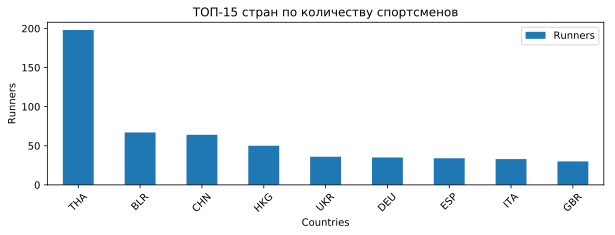

In [639]:
wr = wayf_runners[1:].head(15).plot(kind='bar', rot=45)
wr.set_title('ТОП-15 стран по количеству спортсменов')
wr.set_xlabel('Countries')
wr.set_ylabel('Runners')

**Вывод:** Больше всего участников приехало из **Тайланда** почему-то...

Был выбран тип графика: plot
Почему: Длина (bar chart) хорошо воспринимаются, когда нужно сравить численность групп.

### Задача 2

Как распределились участники по возрастам?


In [640]:
runners_age = marathon_df[['bib', 'age']].groupby('age').count()
#переименуем столбец 'bib'
runners_age.columns = ['Runners']
runners_age.head(10)

,Runners
age,
16,48
17,71
18,71
19,131
20,194
21,218
22,307
23,367
24,520


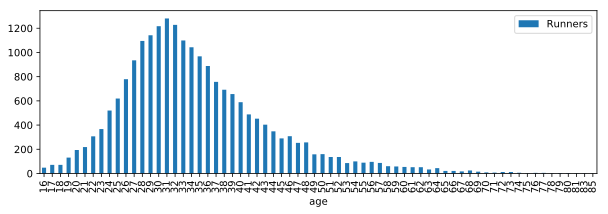

In [641]:
runners_age.plot(kind='bar', rot=90)



Плохо читается возраст, сделаем график пошире, изменним цвет

Text(0,0.5,'Runners')

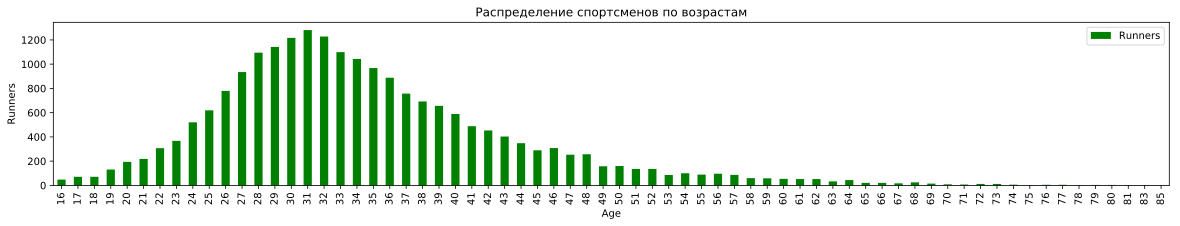

In [644]:
ra = runners_age.plot(kind='bar', rot=90, color = 'green')
rcParams['figure.figsize'] = 20, 3
ra.set_title('Распределение спортсменов по возрастам')
ra.set_xlabel('Age')
ra.set_ylabel('Runners')

In [643]:
#то же самое. но в виде bar
runners_age.style.bar()

,Runners
age,
16,48
17,71
18,71
19,131
20,194
21,218
22,307
23,367
24,520


**Вывод:** марафоны чаще всего бегают 31-летние. Подтверждается собственным опытом.
    
Использован тот же тип визуализации, что и в задаче 1. Причины те же.

### Задача 3

Теперь интересно понять, как распределяются участники по возрастам в разрезе "Марафонец (42,2 км) / Простой смертный (10 км)"

In [646]:
#отфильтруем только бегунов, которые выбрали дистанцию 10 км
common_runners = marathon_df[useful_cols][marathon_df['race'] == "10 km"]
common_runners.head()

,bib,finish_time_sec,race,pace_sec,gender_en,age,name_en,location_city_en,country_code_alpha_3,flag_DNF
8978,17001,2162.0,10 km,216.2,Female,28,Polina Chechetka,Sankt-Peterburg,RUS,0
8979,17002,2003.0,10 km,200.3,Female,28,Elena Sedova,Novosibirsk,RUS,0
8980,17003,2126.0,10 km,212.6,Female,27,Mariya Malysheva,Sankt-Peterburg,RUS,0
8981,17004,2008.0,10 km,200.8,Female,30,Irina Sergeeva,Kursk,RUS,0
8982,17006,1728.0,10 km,172.8,Male,26,Vladimir Nikitin,Perm',RUS,0


In [647]:
#сгруппируем по возрасту обычных бегунов и проверим первые пять групп методом head()
cr = common_runners[['bib', 'age']].groupby('age').count()
#переименуем столбец 'bib'. Это нужно, чтобы при объединении (join) двух датафреймов не было столбцов с одинаковыми именами
cr.columns = ['Common_runners']
cr.head()

,Common_runners
age,
16,48
17,71
18,59
19,90
20,143


In [648]:
#отфильтруем марафонцев
heroes = marathon_df[useful_cols][marathon_df['race'] == '42.195 km']

heroes.head()

,bib,finish_time_sec,race,pace_sec,gender_en,age,name_en,location_city_en,country_code_alpha_3,flag_DNF
0,1,8911.0,42.195 km,211.186159,Female,30,Sardana Trofimova,Yakutsk,RUS,0
1,2,9308.0,42.195 km,220.594857,Female,35,Tat'yana Arkhipova,Cheboksary,RUS,0
2,3,8122.0,42.195 km,192.487262,Male,31,Stepan Kiselev,Kazan',RUS,0
3,4,8467.0,42.195 km,200.663586,Male,36,Dmitriy Safronov,Moskva,RUS,0
4,5,8738.0,42.195 km,207.086148,Male,42,Grigoriy Andreev,Ufa,RUS,0


In [649]:
#сгруппируем по возрасту марафонцев и проверим первые пять групп методом head()
h = heroes[['bib', 'age']].groupby('age').count()
#переименуем столбец 'bib'
h.columns = ['Heroes']
h.head()

,Heroes
age,
18,12
19,41
20,51
21,66
22,77


In [650]:
age_and_level_distribution = cr.join(h)
age_and_level_distribution.head()

,Common_runners,Heroes
age,,
16,48,NaN
17,71,NaN
18,59,12.0
19,90,41.0
20,143,51.0


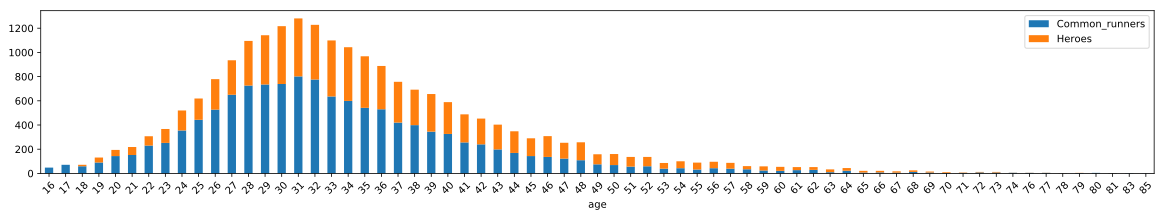

In [651]:
age_and_level_distribution.plot(kind='bar', rot=45, stacked=True)


Text(0,0.5,'Runners')

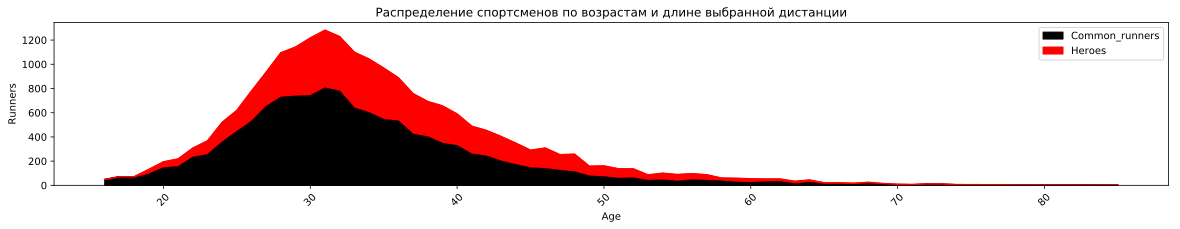

In [652]:
#наведем красоту
aald = age_and_level_distribution.plot(kind='area', rot=45, stacked=True, color = ['black', 'red'])
aald.set_title('Распределение спортсменов по возрастам и длине выбранной дистанции')
aald.set_xlabel('Age')
aald.set_ylabel('Runners')

**Вывод:** марафонцев на Московском марафоне 2018 было меньше, чем любителей, но в целом похоже их численность хорошо кореллирует с численностью любителей.
    Это можно проверить отдельно.

### Задача 3.1

В каком возрасте бегуны приходят к решению бежать марафон?

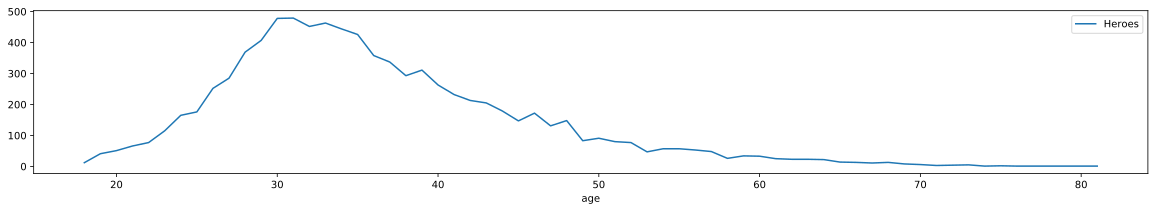

In [653]:
h.plot()

**Вывод:** можно предположить, что наиболее вероятно человек в состоянии пробежать марафон до 30 лет, дальше будет сложнее.

## <center>Часть 2. Применяем Plotly

Используем библиотеку __`plotly`__.

Перед началом работы импортируем все необходимые модули и инициализируем `plotly` с помощью команды `init_notebook_mode`.

In [654]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

### Задача 4

С какого возраста марафонцев становится больше, чем любителей?

In [655]:
#возьмем уже созданный датафрейм, где отдельно посчитаны количества марафонцев и бегунов на 10 км по возрастным группам
age_and_level_distribution.head()

,Common_runners,Heroes
age,,
16,48,NaN
17,71,NaN
18,59,12.0
19,90,41.0
20,143,51.0


In [656]:
trace0 = go.Scatter(
    x=age_and_level_distribution.index,
    y=age_and_level_distribution.Common_runners,
    name='Common_runners'
)

trace1 = go.Scatter(
    x=age_and_level_distribution.index,
    y=age_and_level_distribution.Heroes,
    name='Heroes'
)

data = [trace0, trace1]
layout = {'title': 'Распределение марафонцев и обычных бегунов по возрастам'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

**Вывод:** начиная с 43 лет в беговом спорте остается больше марафонцев, чем простых любителей.

Сохраним график в виде html-файла.

In [657]:
plotly.offline.plot(fig, filename='Распределение бегунов.html', show_link=False);

### Задача 5

Какие имена самые распространенные у бегунов?

In [658]:
#назовем требуемый датасет mardf и добавим к нему столбец first_name, где будут только имена спортсменов
mardf = marathon_df[useful_cols]
mardf['first_name'] = mardf['name_en'].apply(lambda x: (x.split(' '))[0])


In [659]:
mardf.head()

,bib,finish_time_sec,race,pace_sec,gender_en,age,name_en,location_city_en,country_code_alpha_3,flag_DNF,first_name
0,1,8911.0,42.195 km,211.186159,Female,30,Sardana Trofimova,Yakutsk,RUS,0,Sardana
1,2,9308.0,42.195 km,220.594857,Female,35,Tat'yana Arkhipova,Cheboksary,RUS,0,Tat'yana
2,3,8122.0,42.195 km,192.487262,Male,31,Stepan Kiselev,Kazan',RUS,0,Stepan
3,4,8467.0,42.195 km,200.663586,Male,36,Dmitriy Safronov,Moskva,RUS,0,Dmitriy
4,5,8738.0,42.195 km,207.086148,Male,42,Grigoriy Andreev,Ufa,RUS,0,Grigoriy


In [660]:
#выведем топ-30 самых распространенных имен
mardf[['bib', 'first_name']].groupby('first_name').count().sort_values('bib', ascending=False).head(30)

,bib
first_name,
Aleksandr,1062
Sergey,904
Aleksey,839
Dmitriy,808
Andrey,727
Ekaterina,518
Elena,478
Anna,458
Vladimir,411


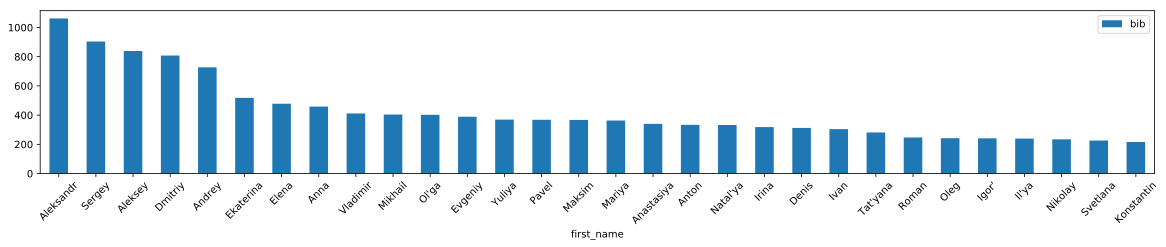

In [661]:
names = mardf[['bib', 'first_name']].groupby('first_name').count().sort_values('bib', ascending=False).head(30)
names.plot(kind='bar', rot=45, stacked=True)

In [662]:
#построим облако слов

In [663]:
#соберем все полные имена 'name_en' в словарь
names = []
for row in marathon_df['name_en']:
    names.append(row.split(' '))
names   

[['Sardana', 'Trofimova'],
 ["Tat'yana", 'Arkhipova'],
 ['Stepan', 'Kiselev'],
 ['Dmitriy', 'Safronov'],
 ['Grigoriy', 'Andreev'],
 ['Mikhail', "Kul'kov"],
 ['Oleg', "Grigor'ev"],
 ['Ruslan', 'Khoroshilov'],
 ['Artem', 'Aplachkin'],
 ['Aleksandr', 'Krotovich'],
 ['Aleksey', 'Troshkin'],
 ['Mikhail', 'Zvyagintsev'],
 ['Viktor', 'Ugarov'],
 ['Mariya', 'Osokina'],
 ['Nina', 'Zarina'],
 ['Renat', 'Kashapov'],
 ["Natal'ya", 'Tikhonova'],
 ['Nadezhda', 'But'],
 ['Aleksandra', 'Afanasova'],
 ['Iskander', 'Yadgarov'],
 ['Aleksey', 'Pavlov'],
 ["Inzil'", 'Salimov'],
 ['Aleksandr', 'Saprykin'],
 ["Il'ya", 'Panin'],
 ['Nikolay', 'Patrakov'],
 ['Vladimir', 'Martynov'],
 ['Alexey', 'Glushkov'],
 ['Aleksandr', 'Deev'],
 ["Igor'", 'Sorokin'],
 ['Vladimir', 'Ivanov'],
 ['Aleksey', 'Makarov'],
 ['Stanislav', 'Zadoshchenko'],
 ['Sergey', 'Chechurin'],
 ["Tat'yana", 'Mitichkina'],
 ['Anton', 'Zheglov'],
 ['Evgeniy', 'Evdokimov'],
 ['Aernoud', 'Van_Hulst'],
 ['Sergey', "Vorob'ev"],
 ['Anton', 'Urusov'],
 

In [664]:
#возьмем только имена (идут первыми)
first_names = []
for name in names:
    first_names.append(name[0])
first_names

['Sardana',
 "Tat'yana",
 'Stepan',
 'Dmitriy',
 'Grigoriy',
 'Mikhail',
 'Oleg',
 'Ruslan',
 'Artem',
 'Aleksandr',
 'Aleksey',
 'Mikhail',
 'Viktor',
 'Mariya',
 'Nina',
 'Renat',
 "Natal'ya",
 'Nadezhda',
 'Aleksandra',
 'Iskander',
 'Aleksey',
 "Inzil'",
 'Aleksandr',
 "Il'ya",
 'Nikolay',
 'Vladimir',
 'Alexey',
 'Aleksandr',
 "Igor'",
 'Vladimir',
 'Aleksey',
 'Stanislav',
 'Sergey',
 "Tat'yana",
 'Anton',
 'Evgeniy',
 'Aernoud',
 'Sergey',
 'Anton',
 'Mikhail',
 'Artem',
 'Dmitriy',
 "Tat'yana",
 'Andrey',
 'Aleksey',
 'Aleksey',
 'Oleg',
 'Evgeniya',
 'Pavel',
 'Aleksandr',
 'Sergey',
 "Il'ya",
 "Igor'",
 'Artur',
 'Dmitriy',
 'Vladimir',
 'Morakot',
 'Ivan',
 'Andrey',
 'Aleksandr',
 'Pavel',
 'Andrey',
 'Pavel',
 'Anton',
 'Sergey',
 'Andrey',
 'Mikhail',
 'Denis',
 'Andrey',
 "Dar'ya",
 'Hatsada',
 'Yuliya',
 'Anatoliy',
 'Timur',
 'Andrey',
 'Dmitry',
 'Anatoliy',
 'Dmitriy',
 'Vladimir',
 'Yuriy',
 'Vasiliy',
 "Il'ya",
 'Aleksandr',
 'Dmitriy',
 'Aleksey',
 'Anton',
 'Alek

In [665]:
#преобразуем список имен в строку
str(first_names)

'[\'Sardana\', "Tat\'yana", \'Stepan\', \'Dmitriy\', \'Grigoriy\', \'Mikhail\', \'Oleg\', \'Ruslan\', \'Artem\', \'Aleksandr\', \'Aleksey\', \'Mikhail\', \'Viktor\', \'Mariya\', \'Nina\', \'Renat\', "Natal\'ya", \'Nadezhda\', \'Aleksandra\', \'Iskander\', \'Aleksey\', "Inzil\'", \'Aleksandr\', "Il\'ya", \'Nikolay\', \'Vladimir\', \'Alexey\', \'Aleksandr\', "Igor\'", \'Vladimir\', \'Aleksey\', \'Stanislav\', \'Sergey\', "Tat\'yana", \'Anton\', \'Evgeniy\', \'Aernoud\', \'Sergey\', \'Anton\', \'Mikhail\', \'Artem\', \'Dmitriy\', "Tat\'yana", \'Andrey\', \'Aleksey\', \'Aleksey\', \'Oleg\', \'Evgeniya\', \'Pavel\', \'Aleksandr\', \'Sergey\', "Il\'ya", "Igor\'", \'Artur\', \'Dmitriy\', \'Vladimir\', \'Morakot\', \'Ivan\', \'Andrey\', \'Aleksandr\', \'Pavel\', \'Andrey\', \'Pavel\', \'Anton\', \'Sergey\', \'Andrey\', \'Mikhail\', \'Denis\', \'Andrey\', "Dar\'ya", \'Hatsada\', \'Yuliya\', \'Anatoliy\', \'Timur\', \'Andrey\', \'Dmitry\', \'Anatoliy\', \'Dmitriy\', \'Vladimir\', \'Yuriy\', \'Va

In [666]:
#удалим лишние символы
str(first_names).replace("'", "")

'[Sardana, "Tatyana", Stepan, Dmitriy, Grigoriy, Mikhail, Oleg, Ruslan, Artem, Aleksandr, Aleksey, Mikhail, Viktor, Mariya, Nina, Renat, "Natalya", Nadezhda, Aleksandra, Iskander, Aleksey, "Inzil", Aleksandr, "Ilya", Nikolay, Vladimir, Alexey, Aleksandr, "Igor", Vladimir, Aleksey, Stanislav, Sergey, "Tatyana", Anton, Evgeniy, Aernoud, Sergey, Anton, Mikhail, Artem, Dmitriy, "Tatyana", Andrey, Aleksey, Aleksey, Oleg, Evgeniya, Pavel, Aleksandr, Sergey, "Ilya", "Igor", Artur, Dmitriy, Vladimir, Morakot, Ivan, Andrey, Aleksandr, Pavel, Andrey, Pavel, Anton, Sergey, Andrey, Mikhail, Denis, Andrey, "Darya", Hatsada, Yuliya, Anatoliy, Timur, Andrey, Dmitry, Anatoliy, Dmitriy, Vladimir, Yuriy, Vasiliy, "Ilya", Aleksandr, Dmitriy, Aleksey, Anton, Aleksandr, Suwannee, Mikhail, "Darya", Kulachart, Dmitriy, Aleksandr, Alexis, Maksim, Andrey, Galina, Dmitriy, Alina, Mikhail, Aleksandr, Dmitriy, "Tatyana", Dmitriy, Andrey, Anna, Evgeniy, Grigoriy, Sergey, Oksana, Areeya, Ekaterina, Nikolay, Christo

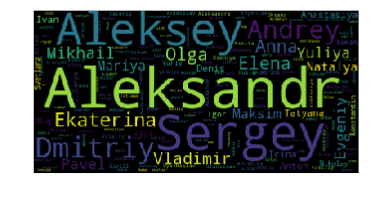

In [670]:
# нашлись библиотеки, с помощью которых можно нарисовать облако тегов. Правда страшное. Преобладают Александры, Сергеи и Алексеи
from scipy.misc import imread
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud

text = str(first_names).replace("'", "")
wordcloud = WordCloud(relative_scaling = 0.9).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [668]:
#в процессе выполнения задания нашлось несколько интересных решений, оставляю в комментариях, может пригодиться
#можно сделать список списков вида: [['Anisiya', 2], ['Ales', 1], ['Moon_Hee', 1], ...]
#[[x,first_names.count(x)] for x in set(first_names)]
#или в виде словаря {'Anisiya': 2, 'Ales': 1, 'Moon_Hee': 1, ... }
#dict((x,first_names.count(x)) for x in set(first_names))
#можно проверить, сколько Львов участвовало в забеге
#first_names.count('Lev')

**Вывод:** преобладают Александры, Сергеи и Алексеи

## <center>Часть 3. Применяем Seaborn

In [671]:
import seaborn as sns

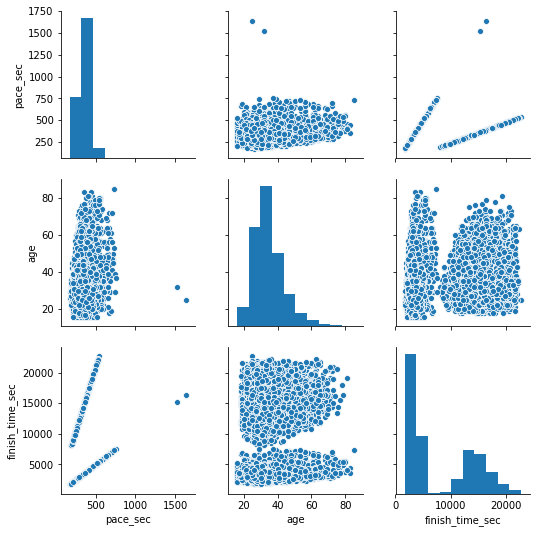

In [672]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    marathon_df[['pace_sec', 'age', 'finish_time_sec']]);
sns_plot.savefig('pairplot2.png')
#посмотрим на корелляции возраст-темп-время прохождения дистанции

### Задача 6

Оценим связь между возрастом и изменением среднего темпа бега

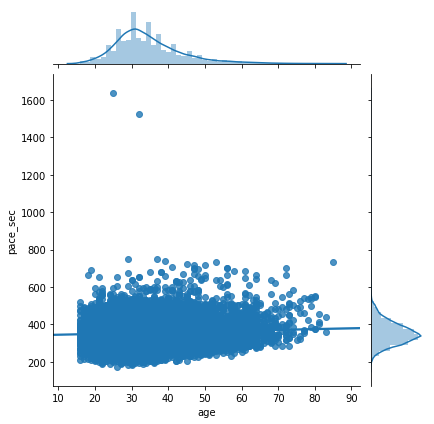

In [673]:
sns.jointplot(x='age', y='pace_sec', 
              data=marathon_df, kind='reg');

In [674]:
#видим выше два выброса. Это не ошибка, это два профи: Artjom Kulya и Dmitriy Shevchenko
# Их результаты (темп, pace_sec) в разы выше, чем у других спортсменов. Смотрим первых пять спортсменов по темпу бега.
mardf.sort_values('pace_sec', ascending = False).head()

,bib,finish_time_sec,race,pace_sec,gender_en,age,name_en,location_city_en,country_code_alpha_3,flag_DNF,first_name
16639,26897,16368.0,10 km,1636.8,Male,25,Artjom Kulya,Odintsovo,RUS,0,Artjom
16835,27138,15268.0,10 km,1526.8,Male,32,Dmitriy Shevchenko,Miami,-,0,Dmitriy
11837,20895,7502.0,10 km,750.2,Male,37,Il'ya Grishin,Balashikha,RUS,0,Il'ya
10894,19667,7477.0,10 km,747.7,Female,29,Ol'ga Tikhonova,Lyubertsy,RUS,0,Ol'ga
9726,18066,7418.0,10 km,741.8,Female,39,Kunlasatri Phannasut,Bangkok,THA,0,Kunlasatri


In [675]:
# а крайняя правая точка - это судя по всему 83 летний ветеран Aleksandr Zakharov из Чебоксар
#для сравнения мой темп - 401.8
mardf[marathon_df['age'] >= 80].sort_values('pace_sec', ascending = False).head()

,bib,finish_time_sec,race,pace_sec,gender_en,age,name_en,location_city_en,country_code_alpha_3,flag_DNF,first_name
14471,24268,7327.0,10 km,732.700000,Male,85,Ivan Lyzhov,Reutov,RUS,0,Ivan
12020,21123,5546.0,10 km,554.600000,Male,80,Valentin Krivolapov,Moskva,RUS,0,Valentin
13958,23618,5443.0,10 km,544.300000,Male,80,Feliks Feygin,Moskva,RUS,0,Feliks
886,1266,19167.0,42.195 km,454.248134,Male,81,Mukhar'yam Yambulatov,Moskva,RUS,0,Mukhar'yam
11570,20561,4401.0,10 km,440.100000,Male,83,Aleksandr Zakharov,Cheboksary,RUS,0,Aleksandr


In [676]:
# интересно узнать, с возрастом средний темп на дистанции (pace_sec) наверно ведь падает?
#используем данные только по марафонцам

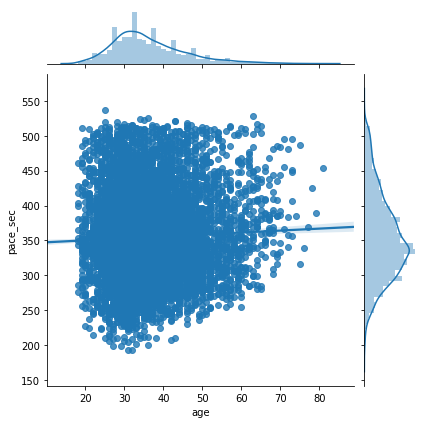

In [677]:
sns.jointplot(x='age', y='pace_sec', 
              data=heroes, kind='reg');

In [678]:
# получается, что нет! С возрастом бегуны начинают держать более высокий темп! Профессионализм

**Вывод**: с опытом бегуны начинают показывать лучший темп, даже на пенсии

In [679]:
# а что на счет общего времени прохождения дистанции. Наверняка у пожилых спортсменов finish_time_sec должен быть больше
#используем данные только по марафонцам

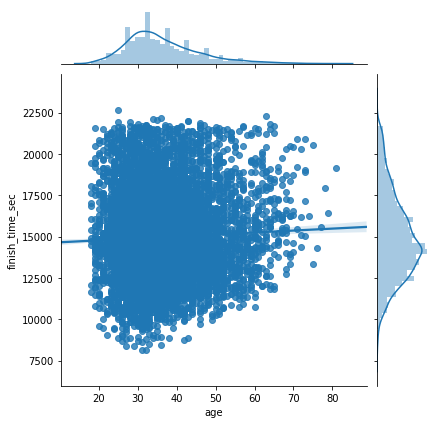

In [680]:
sns.jointplot(x='age', y='finish_time_sec', 
              data=heroes, kind='reg');

In [681]:
#да, эта гипотеза вроде бы подтверждается: более пожилые марафонцы пробегают дистанцию за бОльшее время (спасибо, кэп)


**Вывод:** более пожилые марафонцы пробегают дистанцию за бОльшее время, но возрастные спортсмены не позволяют себе бежать марафон слишком долго (дольше 20 000 секунд), как многие более молодые участники

In [682]:
#собственные результаты:
#marathon_df[useful_cols][marathon_df['name_en'] == "Lev Pikulev"]
#marathon_df[useful_cols][marathon_df['name_en'].isin(["Lev Pikulev"])]

### Задача 7
Показать долю мужчин и женщин

In [683]:
#посмотрим на распределение женщин и мужчин
gender_dist = mardf[['bib', 'gender_en']].groupby('gender_en').count()
gender_dist

,bib
gender_en,
Female,7861
Male,13428


In [684]:
#Соберем в словари значения пол и количество человек.
gender_dist.reset_index()

,gender_en,bib
0,Female,7861
1,Male,13428


In [685]:
genders = []
for row in gender_dist.reset_index()['gender_en']:
    genders.append(row)
genders

['Female', 'Male']

In [686]:
gender_values = []
for row in gender_dist['bib']:
    gender_values.append(row)
gender_values

[7861, 13428]

In [687]:
#строим pie chart

trace = go.Pie(labels=genders, values=gender_values)

iplot([trace], filename='gender_pie_chart')

**Вывод:** на одну девушку почти двое ребят

### Задача 8
Показать средний темп участников из стран, которые выставили наибольшее количество спортсменов.

In [688]:
#всех брать не будем, возьмем страны, которые выставили больше всего участников (без России). Берем только участников -любителей.
# сделаем список 9 таких стран
list(wayf_runners[1:].head(10).index)

['THA', 'BLR', 'CHN', 'HKG', 'UKR', 'DEU', 'ESP', 'ITA', 'GBR']

In [689]:
# смотрим на получившийся датафрейм
com_run = common_runners[common_runners['country_code_alpha_3'].isin(list(wayf_runners[1:].head(10).index))]
com_run.head()

,bib,finish_time_sec,race,pace_sec,gender_en,age,name_en,location_city_en,country_code_alpha_3,flag_DNF
9049,17106,4520.0,10 km,452.0,Female,54,Vivian Chan,Hong Kong,HKG,0
9050,17107,6820.0,10 km,682.0,Male,38,Wasu Vaiyavatjamai,Bangkok,THA,0
9052,17109,3714.0,10 km,371.4,Female,22,Qubie Cheng,Hong Kong,HKG,0
9053,17110,5808.0,10 km,580.8,Male,43,Wittaya Prabjabok,Bangkok,THA,0
9062,17120,4455.0,10 km,445.5,Male,45,Jatuchit Chen,Bangkok,THA,0


In [690]:
# начинаем строить heat map
run_metrica = com_run.pivot_table(
                        index='country_code_alpha_3', 
                        columns='gender_en', 
                        values='finish_time_sec', 
                        aggfunc='mean').fillna(0).applymap(float)

run_metrica

gender_en,Female,Male
country_code_alpha_3,,
BLR,3606.375000,3042.500000
CHN,4266.166667,4851.285714
DEU,4008.250000,3201.000000
ESP,4018.750000,3459.250000
GBR,3850.000000,3963.750000
HKG,5345.470588,4905.500000
ITA,0.000000,3693.142857
THA,5485.763636,5074.777778
UKR,2987.666667,2964.692308


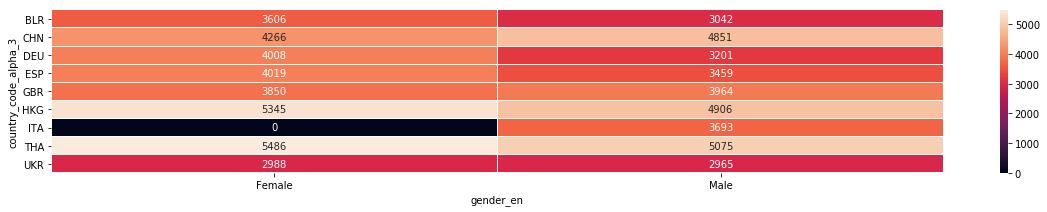

In [691]:
sns.heatmap(run_metrica, annot=True, fmt=".0f", 
            linewidths=0.1);

In [692]:
# черный цвет (где 0) не рассматриваем. Остальные чем темнее оттенок, тем быстрее пробегают дистанцию 10 км представители каждой страны

**Вывод:** украинцы, немцы и белорусы - молодцы. Самые расслабленные - тайцы.